# Bank Marketing Data Set 

## Project Overview

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

**Ada empat kumpulan data:**
1. bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat dekat dengan data yang dianalisis dalam [Moro et al., 2014]
2. bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.
3. bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan input yang lebih sedikit).
4. bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritme pembelajaran mesin yang lebih menuntut komputasi (mis., SVM).

Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y). 

**Attribute Information:**

Input variables:
**bank client data:**
1. age (numeric)
2. job : jenis pekerjaan (kategoris: 'admin.','kerah biru','pengusaha','pembantu rumah tangga','manajemen','pensiunan','wiraswasta','jasa','mahasiswa' ,'teknisi','menganggur','tidak diketahui')
3. marital : status perkawinan (kategori: 'cerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'cerai' berarti cerai atau janda)
4. education (kategoris: 'dasar.4 tahun', 'dasar.6 tahun', 'dasar.9 tahun', 'sekolah menengah', 'buta huruf', 'kursus profesional', 'gelar universitas', 'tidak diketahui')
5. default: apakah kredit default? (kategoris: 'tidak', 'ya', 'tidak diketahui')
6. housing: memiliki pinjaman perumahan? (kategoris: 'tidak', 'ya', 'tidak diketahui')
7. loan: memiliki pinjaman pribadi? (kategoris: 'tidak', 'ya', 'tidak diketahui')

**related with the last contact of the current campaign:**

8. contact: jenis komunikasi kontak (kategori: 'seluler', 'telepon')
9. month: kontak terakhir bulan dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','wed','kamis','fri')
11. duration: durasi kontak terakhir, dalam detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah akhir panggilan y jelas diketahui. Dengan demikian, input ini hanya boleh dimasukkan untuk tujuan benchmark dan harus dibuang jika tujuannya adalah untuk memiliki model prediksi yang realistis.

**other attributes:**

12. campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
13. pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerik; 999 berarti klien tidak dihubungi sebelumnya)
14. previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
15. poutcome: hasil dari kampanye pemasaran sebelumnya (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16. emp.var.rate: tingkat variasi pekerjaan - indikator triwulanan (numerik)
17. cons.price.idx: indeks harga konsumen - indikator bulanan (numerik)
18. cons.conf.idx:  indeks kepercayaan konsumen - indikator bulanan (numerik)
19. euribor3m: tarif euribor 3 bulan - indikator harian (numerik)
20. nr.employed:  jumlah karyawan - indikator triwulanan (numerik) 

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')

## Import Library

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

## Load Data

In [8]:
df= pd.read_csv('Data/bank-full-1.csv',sep=';',engine='python', na_values="unknown")

Menampilan lima data teratas

In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


Menampilakn lima data terbawah

In [10]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Melihat dimensi dataframe

In [11]:
df.shape

(45211, 17)

Menghapus nan pada data

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape #recheck

(7842, 17)

Mengecek apakah ada duplikat data?

In [14]:
df.duplicated().any()

False

In [15]:
df.dropna(inplace=True)

Mendapatkan informasi dasar tentang kerangka data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   job        7842 non-null   object
 2   marital    7842 non-null   object
 3   education  7842 non-null   object
 4   default    7842 non-null   object
 5   balance    7842 non-null   int64 
 6   housing    7842 non-null   object
 7   loan       7842 non-null   object
 8   contact    7842 non-null   object
 9   day        7842 non-null   int64 
 10  month      7842 non-null   object
 11  duration   7842 non-null   int64 
 12  campaign   7842 non-null   int64 
 13  pdays      7842 non-null   int64 
 14  previous   7842 non-null   int64 
 15  poutcome   7842 non-null   object
 16  y          7842 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


Mengkonversi tipe data categorical

In [17]:
categorical = ["job","marital","education", "default", "housing", "loan", "contact", "month","poutcome","y"]

for col in categorical: 
    df[col] = df[col].astype("category")

Mendapatkan list header kolom

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Mendapatkan nilai unik dari setiap kolom

In [19]:
for col in df.columns:
    print(col,': ')
    print(set(df[col].unique()))
    print("......")
    print(" ")
    print(" ")

age : 
{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 88, 89}
......
 
 
job : 
{'technician', 'blue-collar', 'admin.', 'retired', 'self-employed', 'student', 'management', 'unemployed', 'entrepreneur', 'housemaid', 'services'}
......
 
 
marital : 
{'divorced', 'married', 'single'}
......
 
 
education : 
{'secondary', 'tertiary', 'primary'}
......
 
 
default : 
{'no', 'yes'}
......
 
 
balance : 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 8218, 28, 29, 30, 31, 27, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 16430, 47, 8238, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 8262, 71, 72, 73, 8266, 74, 75, 77, 78, 79, 80, 81, 82, 83, 76, 85, 86, 87, 84, 89, 90, 91, 9

## Outlier

Mengetahui statistika data

In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000,7842.000000
mean,40.783856,1552.343280,14.260010,261.290615,2.064269,223.252869,3.184264
std,11.282964,3084.580003,7.885328,236.203272,1.566109,111.830127,4.614190
min,18.000000,-1884.000000,1.000000,5.000000,1.000000,1.000000,1.000000
25%,32.000000,162.000000,7.000000,113.000000,1.000000,133.000000,1.000000
50%,38.000000,595.000000,14.000000,194.000000,2.000000,195.000000,2.000000
75%,47.000000,1733.750000,20.000000,324.000000,2.000000,326.000000,4.000000
max,89.000000,81204.000000,31.000000,2219.000000,16.000000,871.000000,275.000000


Mengecek apakah ada outlier?

Text(0.5, 1.0, '')

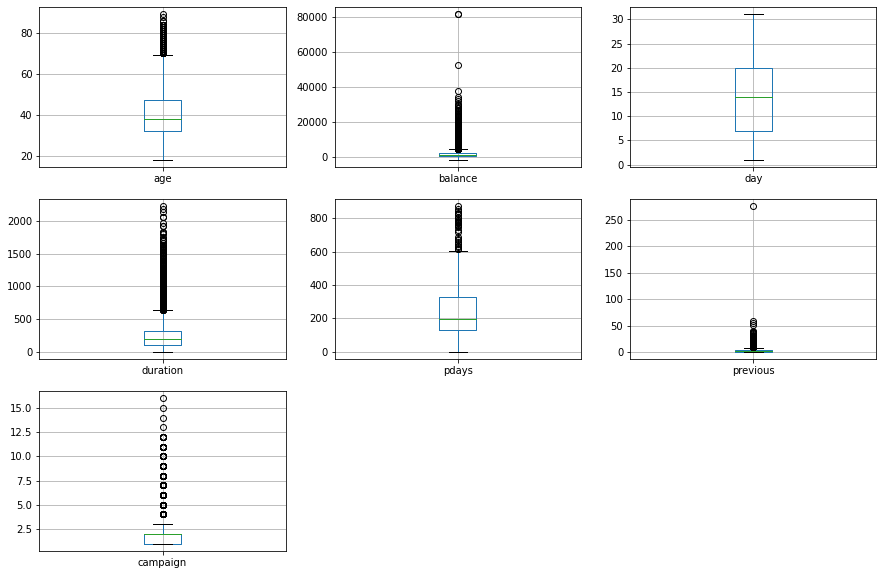

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')

plt.subplot(3,3, 2)
fig = df.boxplot(column='balance')
fig.set_title('')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='day')
fig.set_title('')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='duration')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='pdays')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='previous')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='campaign')
fig.set_title('')

Terlihat bahwa age, balance, duration, pdays, previous dan campaign memiliki outliers.

Menghapus outliers

In [22]:
def remove_outlier(data):
    data = data.sort_values()
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    
    iqr = Q3 - Q1
    
    IQR = Q3 - Q1
    upper = data > (Q3+1.5*IQR)
     # Below Lower bound
    lower = data < (Q1-1.5*IQR)
    return data.index[upper]

In [23]:
df.drop(remove_outlier(df['age']), inplace=True)
df.drop(remove_outlier(df['balance']), inplace=True)
df.drop(remove_outlier(df['duration']), inplace=True)
df.drop(remove_outlier(df['pdays']), inplace=True)
df.drop(remove_outlier(df['previous']), inplace=True)
df.drop(remove_outlier(df['campaign']), inplace=True)

In [24]:
Mengecek kembali apakah ada outlier?

Object `outlier` not found.


In [ ]:
Mengecek kembali apakah ada outlier

Mengecek kembali apakah ada outlier

Text(0.5, 1.0, '')

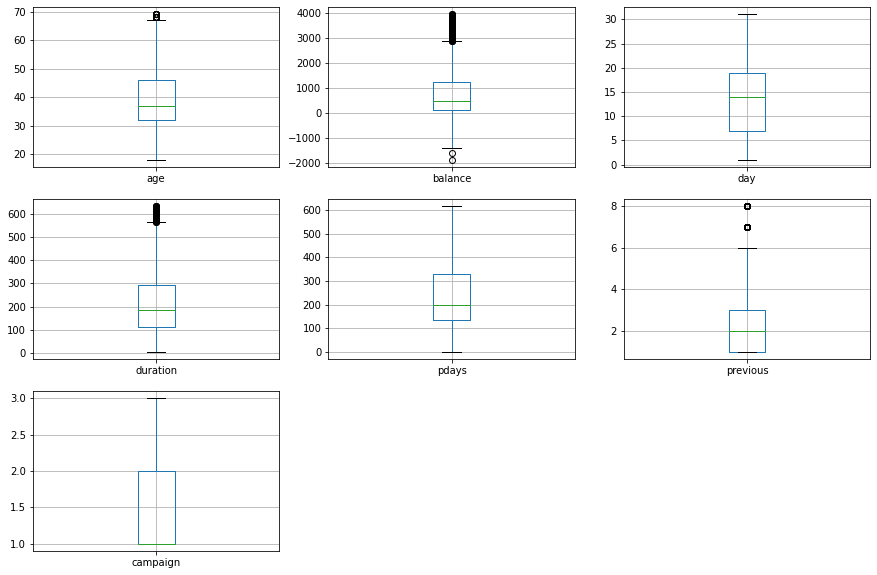

In [25]:
plt.figure(figsize=(15,10))

plt.subplot(3, 3, 1)
fig = df.boxplot(column='age')
fig.set_title('')

plt.subplot(3,3, 2)
fig = df.boxplot(column='balance')
fig.set_title('')

plt.subplot(3, 3, 3)
fig = df.boxplot(column='day')
fig.set_title('')

plt.subplot(3, 3, 4)
fig = df.boxplot(column='duration')
fig.set_title('')

plt.subplot(3, 3, 5)
fig = df.boxplot(column='pdays')
fig.set_title('')

plt.subplot(3, 3, 6)
fig = df.boxplot(column='previous')
fig.set_title('')

plt.subplot(3, 3, 7)
fig = df.boxplot(column='campaign')
fig.set_title('')

## Visualisasi

In [26]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


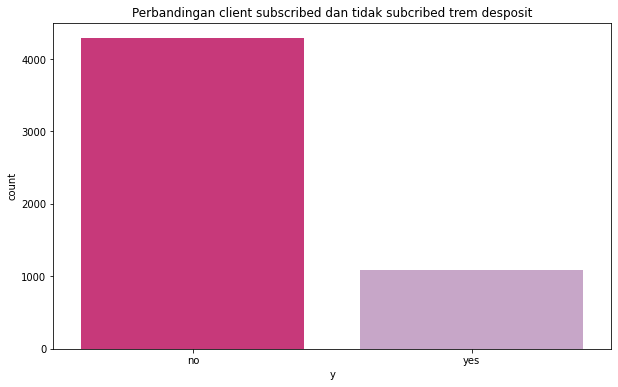

In [27]:
plt.figure(figsize=(10, 6))
 
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit')
sns.countplot(x ='y', data = df, palette='PuRd_r')

plt.show()

Terlihat bahwa customer yang tidak subscribe lebih tinggi dari customer subscribe term desposit.

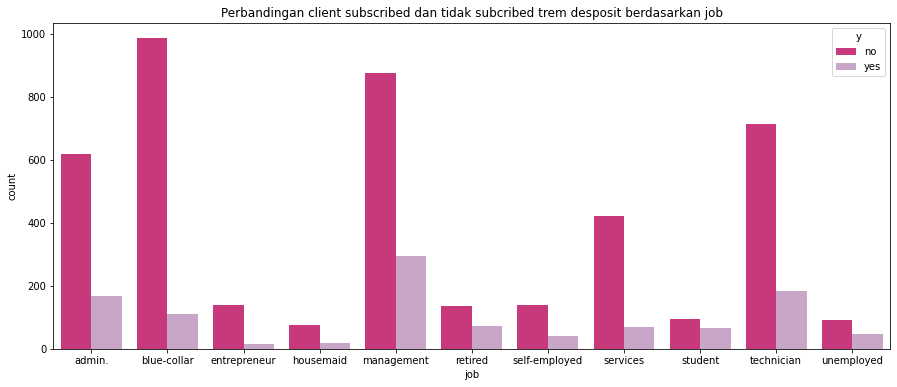

In [28]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan job')
ax = sns.countplot(x = df['job'], hue=df["y"], palette='PuRd_r')
plt.show()

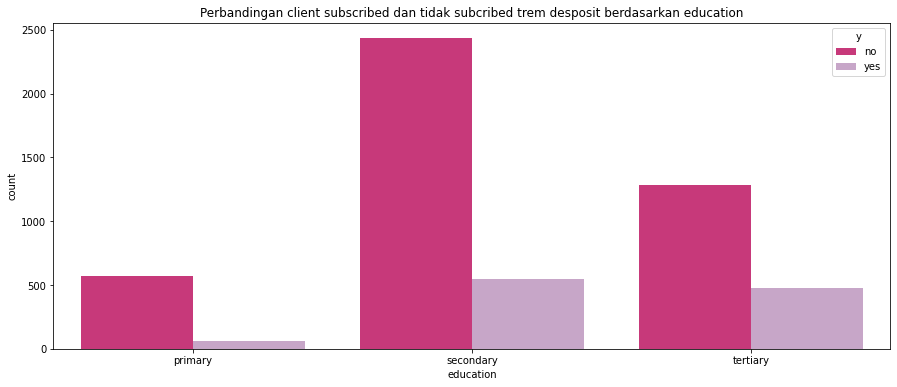

In [29]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan education')
ax = sns.countplot(x = df['education'], hue=df["y"], palette='PuRd_r')
plt.show()

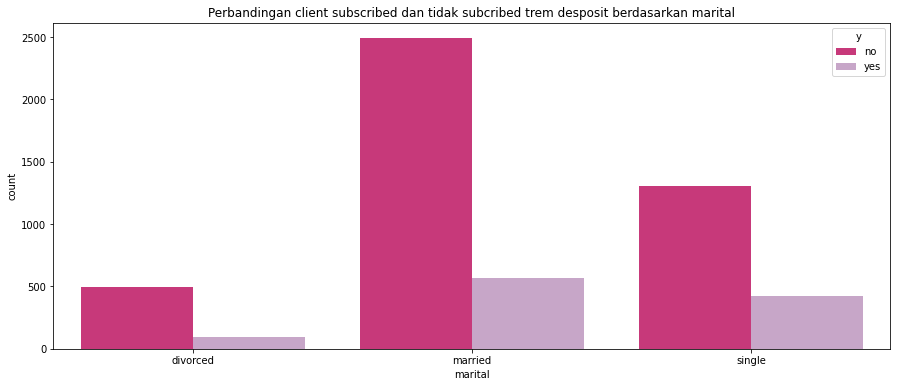

In [30]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan marital')
ax = sns.countplot(x = df['marital'], hue=df["y"], palette='PuRd_r')
plt.show()

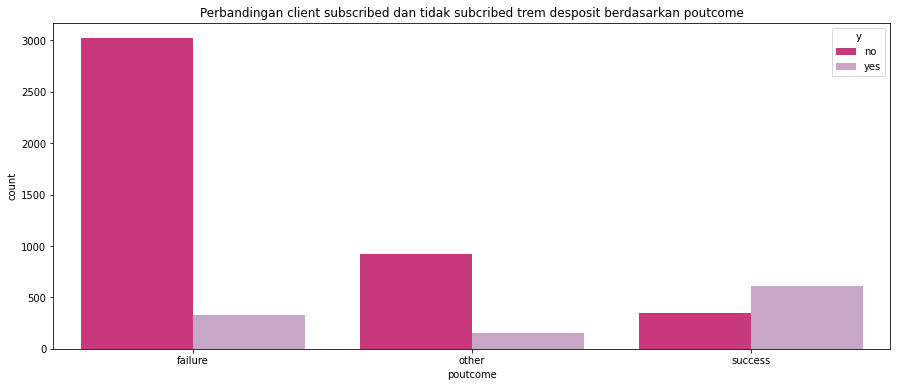

In [31]:
plt.figure(figsize=(15, 6))
plt.title('Perbandingan client subscribed dan tidak subcribed trem desposit berdasarkan poutcome')
ax = sns.countplot(x = df['poutcome'], hue=df["y"], palette='PuRd_r')
plt.show()

## Preprocessing data for classification model

## Encoding

Tipe data kategorikal yang sering digunakan dibagi menjadi 2 yaitu Ordinal dan Nominal. 

- Untuk menangani Nominal Data, bisa menggunakan One Hot Enconding. One Hot Encoding bisa dilakukan dengan 2 cara yaitu melalui Library Scikit-Learn atau dengan method Get Dummies dari pandas.
- Ordinal Data bisa ditreatment menggunakan method Replace dari Pandas atau menggunakan Sklearn Label Encoder.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5375 entries, 24060 to 45201
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        5375 non-null   int64   
 1   job        5375 non-null   category
 2   marital    5375 non-null   category
 3   education  5375 non-null   category
 4   default    5375 non-null   category
 5   balance    5375 non-null   int64   
 6   housing    5375 non-null   category
 7   loan       5375 non-null   category
 8   contact    5375 non-null   category
 9   day        5375 non-null   int64   
 10  month      5375 non-null   category
 11  duration   5375 non-null   int64   
 12  campaign   5375 non-null   int64   
 13  pdays      5375 non-null   int64   
 14  previous   5375 non-null   int64   
 15  poutcome   5375 non-null   category
 16  y          5375 non-null   category
dtypes: category(10), int64(7)
memory usage: 519.2 KB


In [33]:
numc = list(df.select_dtypes(include=['int64']).columns.values)
catc = list(df.select_dtypes(include=['category']).columns.values)

In [34]:
numc

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [35]:
catc

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

Data nominal : tipe data yang paling sederhana dimana nilai yang diberikan kepada item (record) hanya berupa label atau sekadar penamaan saja, tidak dapat diurut dan tidak dapat diukur. 

Data ordinal : Jika data kategori dapat diurutkan dari yang paling rendah sampai yang paling tinggi,

In [36]:
nom = ['job','marital','default','contact', 'poutcome' ]
ord = ['education','housing','loan','month','y']

Menerapkan **One-Hot Encoding** yaitu teknik yang merubah setiap nilai di dalam kolom menjadi kolom baru dan mengisinya dengan nilai biner yaitu 0 dan 1. Menggunakan dummies values di Pandas dengan menggunakan fungsi get_dummies() 

In [37]:
df = pd.get_dummies(data=df,columns=['job','marital','default','contact', 'poutcome'])

Menerapkan **Label encoding** mengubah setiap nilai dalam kolom menjadi angka yang berurutan. Dalam Python kita bisa gunakan Python Pandas untuk melakukan label encoding menggunakan library sci-kit LabelEncoder dan lakukan proses fit_transform() dengan kolom yang ingin dirubah

In [38]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for ord_col in ord:
    df[ord_col] = encoder.fit_transform(df[ord_col])

In [39]:
df

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,default_no,default_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24060,33,2,882,0,0,21,10,39,1,151,...,0,1,0,1,0,0,1,1,0,0
24062,42,1,-247,1,1,21,10,519,1,166,...,0,0,1,1,0,0,1,0,1,0
24064,33,1,3444,1,0,21,10,144,1,91,...,0,1,0,1,0,0,1,1,0,0
24072,36,2,2415,1,0,22,10,73,1,86,...,0,1,0,1,0,0,1,0,1,0
24077,36,2,0,1,0,23,10,140,1,143,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,1,136,0,0,16,9,206,1,188,...,0,1,0,1,0,1,0,0,0,1
45193,28,2,159,0,0,16,9,449,2,33,...,0,0,1,1,0,1,0,0,0,1
45194,59,2,138,1,1,16,9,162,2,187,...,0,1,0,1,0,1,0,1,0,0
45195,68,1,1146,0,0,16,9,212,1,187,...,0,1,0,1,0,1,0,0,0,1


In [40]:
df.columns

Index(['age', 'education', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'default_no', 'default_yes',
       'contact_cellular', 'contact_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

## Feature dan target

Seperating Features and Target

In [41]:
# select feataures
features = df.drop('y', axis=1)
features

,age,education,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_divorced,marital_married,marital_single,default_no,default_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
24060,33,2,882,0,0,21,10,39,1,151,...,0,1,0,1,0,0,1,1,0,0
24062,42,1,-247,1,1,21,10,519,1,166,...,0,0,1,1,0,0,1,0,1,0
24064,33,1,3444,1,0,21,10,144,1,91,...,0,1,0,1,0,0,1,1,0,0
24072,36,2,2415,1,0,22,10,73,1,86,...,0,1,0,1,0,0,1,0,1,0
24077,36,2,0,1,0,23,10,140,1,143,...,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45190,32,1,136,0,0,16,9,206,1,188,...,0,1,0,1,0,1,0,0,0,1
45193,28,2,159,0,0,16,9,449,2,33,...,0,0,1,1,0,1,0,0,0,1
45194,59,2,138,1,1,16,9,162,2,187,...,0,1,0,1,0,1,0,1,0,0
45195,68,1,1146,0,0,16,9,212,1,187,...,0,1,0,1,0,1,0,0,0,1


In [42]:
# select target
target = df['y']
target

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45190    1
45193    1
45194    0
45195    1
45201    1
Name: y, Length: 5375, dtype: int32

## Split data

Split dataset into training set and test set

In [43]:
from sklearn.model_selection import train_test_split

## split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state= 1)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions X_test dataset : ", X_test.shape)
print(" ")
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions y_test dataset : ", y_test.shape)

Number transactions X_train dataset:  (3762, 32)
Number transactions X_test dataset :  (1613, 32)
 
Number transactions y_train dataset:  (3762,)
Number transactions y_test dataset :  (1613,)


## Imbalance data

Menghandle imbalance data dengan SMOTE (Sintetis Minoritas Sampling Teknik)

In [44]:
df['y'].value_counts()

0    4287
1    1088
Name: y, dtype: int64

In [45]:
from collections import Counter
Counter(y_train)

Counter({1: 781, 0: 2981})

In [46]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_resample(X_train,y_train)

In [47]:
Counter(y_train_smote)

Counter({1: 2981, 0: 2981})

## Scaler

Standardizing the data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # scaling X_train
X_train_smote = scaler.fit_transform(X_train_smote) # scaling over_X_train

X_test = scaler.transform(X_test)

## Logitsic Regression

### Logistic Regression 

In [49]:
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

pred1 = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.8586484810911346
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1306
           1       0.76      0.38      0.50       307

    accuracy                           0.86      1613
   macro avg       0.81      0.67      0.71      1613
weighted avg       0.85      0.86      0.84      1613



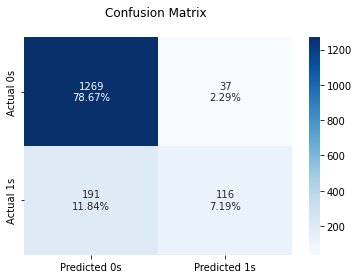

In [50]:
cm = confusion_matrix(y_test, pred1)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])


plt.show()

### Logistic Regression dengan SMOTE

In [51]:
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train_smote, y_train_smote)

pred11 = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred11))
print(classification_report(y_test, pred11))

Accuracy Score: 0.861128332300062
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1306
           1       0.67      0.53      0.59       307

    accuracy                           0.86      1613
   macro avg       0.78      0.74      0.76      1613
weighted avg       0.85      0.86      0.85      1613



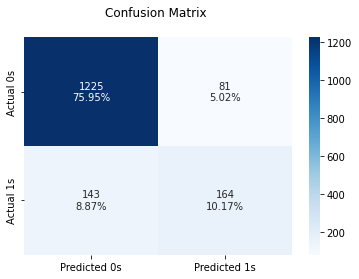

In [52]:
cm = confusion_matrix(y_test, pred11)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## Decision Tree

### Decision Tree

In [53]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

pred2 = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2 ))
print(classification_report(y_test, pred2 ))

Accuracy Score: 0.8257904525728457
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      1306
           1       0.55      0.49      0.51       307

    accuracy                           0.83      1613
   macro avg       0.71      0.70      0.70      1613
weighted avg       0.82      0.83      0.82      1613



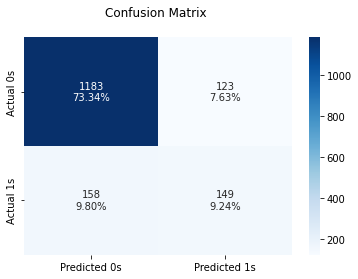

In [54]:
cm = confusion_matrix(y_test, pred2)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

### Decision Tree Smote

In [55]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train_smote, y_train_smote)

pred22  = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred22 ))
print(classification_report(y_test, pred22 ))

Accuracy Score: 0.8251704897706138
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1306
           1       0.53      0.63      0.58       307

    accuracy                           0.83      1613
   macro avg       0.72      0.75      0.73      1613
weighted avg       0.84      0.83      0.83      1613



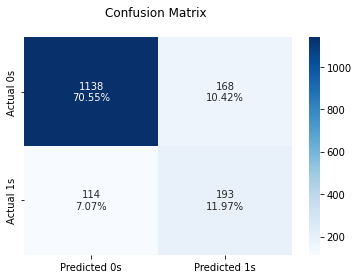

In [56]:
cm = confusion_matrix(y_test, pred22)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## RandomForestClassifier

### Random Forest

In [57]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred3  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred3  ))
print(classification_report(y_test, pred3  ))

Accuracy Score: 0.8729076255424675
              precision    recall  f1-score   support

           0       0.89      0.97      0.92      1306
           1       0.77      0.48      0.59       307

    accuracy                           0.87      1613
   macro avg       0.83      0.72      0.76      1613
weighted avg       0.86      0.87      0.86      1613



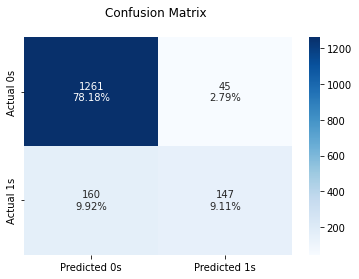

In [58]:
cm = confusion_matrix(y_test, pred3)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

### Random Forest Smote

In [59]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_smote, y_train_smote)

pred33   = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred33))
print(classification_report(y_test, pred33))

Accuracy Score: 0.8679479231246126
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1306
           1       0.67      0.62      0.64       307

    accuracy                           0.87      1613
   macro avg       0.79      0.77      0.78      1613
weighted avg       0.86      0.87      0.87      1613



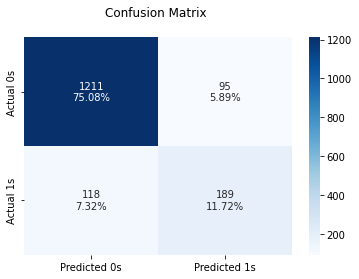

In [60]:
cm = confusion_matrix(y_test, pred33)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## Naive Bayes

### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

pred4 = nb_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred4 ))
print(classification_report(y_test, pred4 ))

Accuracy Score   : 0.8003719776813392
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1306
           1       0.48      0.60      0.53       307

    accuracy                           0.80      1613
   macro avg       0.69      0.72      0.70      1613
weighted avg       0.82      0.80      0.81      1613



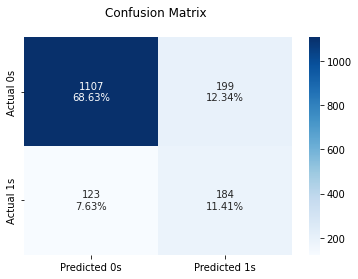

In [62]:
cm = confusion_matrix(y_test, pred4)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

### Naive Bayes Smote

In [63]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_smote, y_train_smote)

pred44  = nb_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred44))
print(classification_report(y_test, pred44))

Accuracy Score   : 0.7315561066336019
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1306
           1       0.37      0.59      0.46       307

    accuracy                           0.73      1613
   macro avg       0.63      0.68      0.64      1613
weighted avg       0.79      0.73      0.75      1613



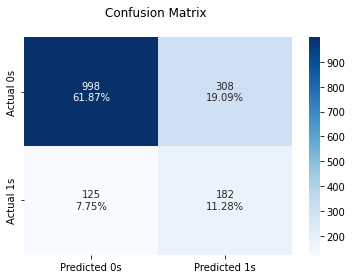

In [64]:
cm = confusion_matrix(y_test, pred44)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## Knearest neighbors Classifier

### knearest neighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

pred5 = knn.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

Accuracy Score   : 0.8456292622442654
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1306
           1       0.65      0.42      0.51       307

    accuracy                           0.85      1613
   macro avg       0.76      0.68      0.71      1613
weighted avg       0.83      0.85      0.83      1613



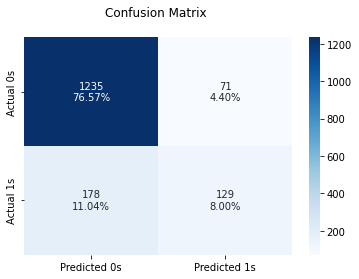

In [66]:
cm = confusion_matrix(y_test, pred5)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

### Knearest Neighbors Classifier Smote

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)

pred55 = knn.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred55))
print(classification_report(y_test, pred55))

Accuracy Score   : 0.8468691878487291
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1306
           1       0.61      0.53      0.57       307

    accuracy                           0.85      1613
   macro avg       0.75      0.73      0.74      1613
weighted avg       0.84      0.85      0.84      1613



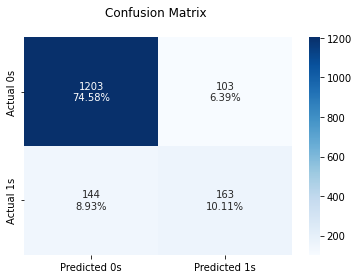

In [68]:
cm = confusion_matrix(y_test, pred55)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

plt.show()

## Support Vector Machine (SVM)

### Support Vector Machine (SVM)

In [69]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

pred6 = svm_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred6))
print(classification_report(y_test, pred6))

Accuracy Score   : 0.8586484810911346
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1306
           1       0.73      0.41      0.52       307

    accuracy                           0.86      1613
   macro avg       0.80      0.69      0.72      1613
weighted avg       0.85      0.86      0.84      1613



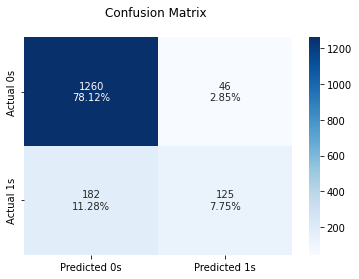

In [70]:
cm = confusion_matrix(y_test, pred6)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Support Vector Machine (SVM) Smote

In [71]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_smote, y_train_smote)

pred66 = svm_model.predict(X_test)

print("Accuracy Score   :", accuracy_score(y_test, pred66))
print(classification_report(y_test, pred66))


Accuracy Score   : 0.8555486670799752
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1306
           1       0.65      0.51      0.58       307

    accuracy                           0.86      1613
   macro avg       0.77      0.73      0.74      1613
weighted avg       0.85      0.86      0.85      1613



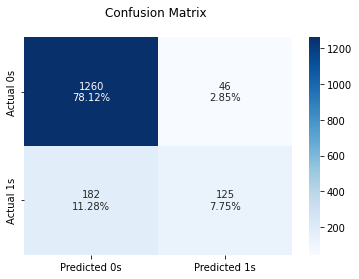

In [72]:
cmap = confusion_matrix(y_test, pred66)

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}" for v1, v2, in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix \n');

ax.xaxis.set_ticklabels(['Predicted 0s', 'Predicted 1s'])
ax.yaxis.set_ticklabels(['Actual 0s', 'Actual 1s'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [73]:
print('Accuracy Score Model Algoritma')
print("Logistic Regression :", accuracy_score(y_test, pred1))
print("Decision Tree       :", accuracy_score(y_test, pred2))
print("Random Forest       :", accuracy_score(y_test, pred3))
print("Niabe Bayes         :", accuracy_score(y_test, pred4))
print("KNN                 :", accuracy_score(y_test, pred5))
print("SVM                 :", accuracy_score(y_test, pred6))



print('\nAccuracy Score Model Algoritma Setelah smooth')
print("Logistic Regression :", accuracy_score(y_test, pred11))
print("Decision Tree       :", accuracy_score(y_test, pred22))
print("Random Forest       :", accuracy_score(y_test, pred33))
print("Niabe Bayes         :", accuracy_score(y_test, pred44))
print("KNN                 :", accuracy_score(y_test, pred55))
print("SVM                 :", accuracy_score(y_test, pred66))

Accuracy Score Model Algoritma
Logistic Regression : 0.8586484810911346
Decision Tree       : 0.8257904525728457
Random Forest       : 0.8729076255424675
Niabe Bayes         : 0.8003719776813392
KNN                 : 0.8456292622442654
SVM                 : 0.8586484810911346

Accuracy Score Model Algoritma Setelah smooth
Logistic Regression : 0.861128332300062
Decision Tree       : 0.8251704897706138
Random Forest       : 0.8679479231246126
Niabe Bayes         : 0.7315561066336019
KNN                 : 0.8468691878487291
SVM                 : 0.8555486670799752


Dari hasil accuracy score diaatas terlihat bahwa Random Forest memiliki nilai paling tinggi diantara yang lain.